# Deep learning : cas d’étude

Cette étude consiste à réaliser un outil de classification basé sur un algorithme portant sur les réseaux de neurones artificiels. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

from math import isnan
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import torch 
from torch.utils.data import DataLoader
from torch.nn.utils import clip_grad_norm_

import custom_functions

## Importation des données

Spotify_songs : fichier csv contenant + de 30 000 chansons

In [2]:
spotify = pd.read_csv(".\data\spotify_songs.csv")
pd.set_option('display.max_columns',500)
spotify

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


## Statistiques descriptives

In [3]:
#Dimensions de notre jeu de données
spotify.shape #+ de 30 000 lignes pour 23 colonnes

(32833, 23)

In [4]:
#Description des variables et leur type 
spotify.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
#Description des variables quantitatives
spotify.describe() #beaucoup de disparités au niveau des unités, il faudra normaliser nos données

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
#description des variables qualitatives
spotify.describe(include='object') #beaucoup de variables qualitatives différentes par colonne, on ne pourra pas toutes les garder pour notre modèle
                                #mais possibilité d'encoder notre variable à prédire : playlist_genre

,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre
count,32833,32828,32828,32833,32828,32833,32833,32833,32833,32833
unique,28356,23449,10692,22545,19743,4530,449,471,6,24
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,2020-01-10,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,progressive electro house
freq,10,22,161,42,139,270,308,247,6043,1809


In [7]:
#On affiche s'il y a des valeurs NaN
print("Number of NaN :", spotify.isna().sum().sum()) #à priori, 15 NaN dans notre fichier

Number of NaN : 15


In [8]:
#Détails sur quelles colonnes
spotify.isna().sum() #track_name, track_artist et track_album_name contiennent respectivement 5 NaN, peut-être les mêmes individus concernés ?

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [9]:
#Lignes correspondant au NaN dans track_name
spotify[spotify['track_name'].isna()] #en regardant les 3 colonnes, ce sont bien les mêmes individus qui sont concernés

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [10]:
#Etant donné que ce sont variabes qualitatives, il est difficile de les remplacer par la moyenne ou la médiane
#ou par le mod puisque chaque ligne représente une chanson différente. On va donc supprimer ces lignes
spotify = spotify.dropna()

In [11]:
#Représentation de notre variable à prédire par rapport à la variable playlist_subgenre et playlist_genre
fig = px.sunburst(spotify,
                  path=['playlist_genre', 'playlist_subgenre'], 
                  color='track_popularity', 
                  labels={'track_popularity': 'Popularity'})
fig.show()


In [12]:
#Variable à prédire
y = spotify["playlist_genre"]
y_label = spotify["playlist_genre"].unique()
spotify.drop(columns=['playlist_genre'], inplace=True) #on retire la variable cible du dataset
print(y_label) #représente le genre de la musique
y_label.shape #on a 6 modalités, pop, rap, rock, latino, rhythm and blues (r&b) et electronic (edm)

['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']


(6,)

In [13]:
#les classes sont-elles équilibrées ? Si non, possibilité d'over- ou under-sampling
nb_y = y.value_counts()
print(nb_y)
freq_y = y.value_counts() / len(y)
print(freq_y) #les classes sont bien équilibrées

playlist_genre
edm      6043
rap      5743
pop      5507
r&b      5431
latin    5153
rock     4951
Name: count, dtype: int64
playlist_genre
edm      0.184081
rap      0.174942
pop      0.167753
r&b      0.165438
latin    0.156970
rock     0.150816
Name: count, dtype: float64


In [14]:
#On souhaite garder l'année de sortie de l'album, or elle contient beaucoup de modalités
spotify['track_album_release_date'] = spotify['track_album_release_date'].str[:4]
print(spotify['track_album_release_date'].unique()) #on a 60 modalités, on va donc regrouper les années par décennie

['2019' '2018' '2017' '2016' '2014' '2012' '2015' '2013' '2011' '2010'
 '2008' '2020' '2007' '1998' '1996' '1999' '2009' '1993' '1995' '1991'
 '2000' '1994' '1992' '1997' '2001' '2006' '2002' '2003' '2005' '1990'
 '2004' '1988' '1984' '1982' '1973' '1979' '1977' '1981' '1974' '1970'
 '1976' '1987' '1978' '1969' '1986' '1980' '1983' '1985' '1989' '1975'
 '1968' '1971' '1972' '1967' '1966' '1965' '1964' '1963' '1962' '1957'
 '1958' '1961' '1960']


In [15]:
#On va alors créer des intervalles d'années par décennie
spotify['Year'] = pd.cut(spotify['track_album_release_date'].astype(int),
                                             bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
                                             labels=['50s', '60s', '70s', '80s', '90s', '00s', '10s'])

print(spotify['Year']) #on obtient alors 7 modalités soit 7 colonnes une fois qu'on aura fait le OneHotEncoder

0        10s
1        10s
2        10s
3        10s
4        10s
        ... 
32828    10s
32829    10s
32830    10s
32831    10s
32832    10s
Name: Year, Length: 32828, dtype: category
Categories (7, object): ['50s' < '60s' < '70s' < '80s' < '90s' < '00s' < '10s']


In [16]:
#Représentation de notre variable à prédire par rapport à la variable playlist_subgenre
fig = px.histogram(spotify,
                  x = 'Year',
                  color = 'playlist_subgenre')
#change the legend title
fig.update_layout(
    title_text="Distribution des sous-genres musicaux par classe d'années",
    xaxis_title_text="Classe d'années",
    yaxis_title_text="Nombre de chansons",)
fig.show() #on voit bien l'explosion des genres musicaux à partir des années 2000 et surtout 2010

In [17]:
#Suppression des variables trop corrélées à a variable cible et des variables qualitatives avec beaucoup de modalités
spotify.drop(columns=['track_id','track_artist','track_album_id', 'track_album_name','track_album_release_date','track_name', 'playlist_id','playlist_subgenre','playlist_name'], axis=1, inplace=True)

In [18]:
spotify.head(5)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,10s
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,10s
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,10s
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,10s
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,10s


In [19]:
#Il faut OneHotEncoder la variable Year
spotify = pd.get_dummies(spotify, columns=['Year'], dtype=int)

#On vérifie qu'on a bien toutes les colonnes
pd.set_option('display.max_columns', None)
spotify.head(5) 

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year_50s,Year_60s,Year_70s,Year_80s,Year_90s,Year_00s,Year_10s
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,0,0,0,0,0,0,1
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,0,0,0,0,0,0,1
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,0,0,0,0,0,0,1
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,0,0,0,0,0,0,1
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,0,0,0,0,0,0,1


In [20]:
spotify.shape #on a bien 20 colonnes maintenant

(32828, 20)

In [21]:
#On regarde la corrélation entre les variables
corr = spotify.corr()
corr.style.background_gradient(cmap='coolwarm')
#on voit que les variables sont peu corrélées entre elles, seulement entre l'energy et la loudness
#On ne va pas pour autant en supprimer

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Year_50s,Year_60s,Year_70s,Year_80s,Year_90s,Year_00s,Year_10s
track_popularity,1.000000,0.064754,-0.108984,-0.000405,0.057717,0.010553,0.007067,0.085042,-0.150003,-0.054593,0.033278,-0.005538,-0.143634,-0.008384,0.021281,0.034031,0.008044,-0.033613,-0.137528,0.103009
danceability,0.064754,1.000000,-0.086074,0.011771,0.025351,-0.058711,0.181808,-0.024515,-0.008658,-0.123899,0.330538,-0.184132,-0.096922,-0.019455,-0.080793,-0.137549,-0.061569,0.032860,-0.027787,0.097297
energy,-0.108984,-0.086074,1.000000,0.009972,0.676662,-0.004778,-0.032184,-0.539732,0.033282,0.161317,0.151050,0.150072,0.012560,-0.010254,-0.037504,-0.046675,0.001988,-0.049250,0.046594,0.017259
key,-0.000405,0.011771,0.009972,1.000000,0.000920,-0.173981,0.022462,0.004378,0.006022,0.002834,0.019933,-0.013316,0.015141,0.007731,-0.014989,-0.014507,-0.006601,0.021419,0.002242,-0.002972
loudness,0.057717,0.025351,0.676662,0.000920,1.000000,-0.019242,0.010313,-0.361646,-0.147823,0.077589,0.053411,0.093761,-0.115039,-0.004573,-0.087897,-0.162558,-0.190135,-0.142686,0.024024,0.226146
mode,0.010553,-0.058711,-0.004778,-0.173981,-0.019242,1.000000,-0.063446,0.009399,-0.006760,-0.005485,0.002567,0.014339,0.015576,0.008586,0.041403,0.064254,0.048475,0.008625,0.011678,-0.067647
speechiness,0.007067,0.181808,-0.032184,0.022462,0.010313,-0.063446,1.000000,0.026168,-0.103385,0.055337,0.064756,0.044649,-0.089432,-0.006861,-0.044908,-0.089656,-0.095810,0.041130,0.014757,0.050279
acousticness,0.085042,-0.024515,-0.539732,0.004378,-0.361646,0.009399,0.026168,1.000000,-0.006881,-0.077247,-0.016833,-0.112782,-0.081553,0.031094,0.044130,0.041835,-0.028004,-0.038671,-0.027656,0.030285
instrumentalness,-0.150003,-0.008658,0.033282,0.006022,-0.147823,-0.006760,-0.103385,-0.006881,1.000000,-0.005505,-0.175406,0.023303,0.063256,-0.005504,-0.001194,-0.026870,-0.035021,-0.062465,-0.060671,0.107710
liveness,-0.054593,-0.123899,0.161317,0.002834,0.077589,-0.005485,0.055337,-0.077247,-0.005505,1.000000,-0.020432,0.020887,0.006197,0.006549,-0.002146,0.000929,-0.013136,0.028670,0.020789,-0.026482


In [22]:
#On modifie la variable à prédire en numérique pour chaque modalité
y = y.replace('pop', 0)
y = y.replace('rap', 1)
y = y.replace('rock', 2)
y = y.replace('r&b', 3)
y = y.replace('latin', 4)
y = y.replace('edm', 5)
print(y) #pas la meilleure solution car on biaise le modèle en mettant un "ordre" dans les modalités

0        0
1        0
2        0
3        0
4        0
        ..
32828    5
32829    5
32830    5
32831    5
32832    5
Name: playlist_genre, Length: 32828, dtype: int64


In [23]:
#normalisation des données
scaler = StandardScaler()
spotify = scaler.fit_transform(spotify) 

## Test avec d'autres modèles de classification
Aucun travail de classification a été fait avec ce jeu de données, nous allons tester d'autres modèles de machine learning afin de pouvoir comparer nos résultats

In [24]:
train_X, test_X, train_y, test_y = train_test_split(spotify, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    stratify=y)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
y_pred = logreg.predict(test_X)
print('Accuracy score avec classification par régression logistique sur le jeu de données de test: {:.2f}'.format(accuracy_score(test_y, y_pred)))

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(train_X, train_y)
y_pred = clf.predict(test_X)
print('Accuracy score avec classification par arbre de décision sur le jeu de données de test: {:.2f}'.format(accuracy_score(test_y, y_pred)))

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)
print('Accuracy score avec classification par KNN sur le jeu de données de test: {:.2f}'.format(accuracy_score(test_y, y_pred)))

#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)
y_pred = rf.predict(test_X)
print('Accuracy score avec classification par Random Forest sur le jeu de données de test: {:.2f}'.format(accuracy_score(test_y, y_pred)))

Accuracy score avec classification par régression logistique sur le jeu de données de test: 0.49
Accuracy score avec classification par arbre de décision sur le jeu de données de test: 0.45
Accuracy score avec classification par KNN sur le jeu de données de test: 0.50
Accuracy score avec classification par Random Forest sur le jeu de données de test: 0.57


## Implémentation

In [25]:
#On crée un set de validation pour tester nos modèles
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=100,
                                                    stratify=train_y)

#On change Y en numpy.ndarray
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
y_val = y_val.to_numpy()

## Transformer les données en Tenseurs 
X_train = torch.FloatTensor(train_X)
X_test = torch.FloatTensor(test_X)
Y_train = torch.LongTensor(train_y)
Y_test = torch.LongTensor(test_y)
X_val = torch.FloatTensor(X_val)
Y_val = torch.LongTensor(y_val)
 
print("Dimension de X train",X_train.shape)
print("Dimension de X test",X_test.shape)
print("Dimension de X validation",X_val.shape)
print("Dimension de Y", Y_train.shape)

Dimension de X train torch.Size([22979, 20])
Dimension de X test torch.Size([9849, 20])
Dimension de X validation torch.Size([6894, 20])
Dimension de Y torch.Size([22979])


On transforme la variable cible pour obtenir un codage disjonctif complet, autrement appelé *one hot encoding* :

- 0 -> (1,0,0,0,0,0)    pop
- 1 -> (0,1,0,0,0,0)    rap
- 2 -> (0,0,1,0,0,0)    rock
- 3 -> (0,0,0,1,0,0)    r&b
- 4 -> (0,0,0,0,1,0)    latin
- 5 -> (0,0,0,0,0,1)    edm


In [26]:
Y_train_cat = torch.nn.functional.one_hot(Y_train)
Y_test_cat = torch.nn.functional.one_hot(Y_test)
Y_val_cat = torch.nn.functional.one_hot(Y_val)
print("Dimension de Y train",Y_train_cat.shape)
print(Y_train_cat)

Dimension de Y train torch.Size([22979, 6])
tensor([[0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        ...,
        [0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1]])


In [60]:
dataset_train = custom_functions.CustomDataset(X_train, Y_train_cat)
#On applique d'ores-et-déjà un DataLoader pour pouvoir faire du batch learning
batch_size = 5000 #nombre d'individus par batch
dataloader = custom_functions.get_dataloader(dataset_train, batch_size, shuffle=True)

## Perceptron avec une couche cachée

### Description du modèle

In [61]:
# Le modèle : un simple MLP à 1 couche cachée
D_in = 20 # dimension de l'input : 20 
D_hidden = 32 # dimension de la couche cachée : 32
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.Sigmoid(), #test avec une fonction d'activation sigmoïde
    torch.nn.Linear(D_hidden, D_out),
)
print(model) 
 
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=32, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=32, out_features=6, bias=True)
)


In [62]:
#Fonction qui calcule le nombre de paramètres de notre modèle, très utile
custom_functions.summary(model)

Couche 0: [32, 20] (640 paramètres entrainables)
Couche 1: [32] (32 paramètres entrainables)
Couche 2: [6, 32] (192 paramètres entrainables)
Couche 3: [6] (6 paramètres entrainables)
  = 870 paramètres entrainables


### Apprentissage du modèle

In [64]:
Nepochs = 10 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs/5  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 30259.7845 val 49.72%
epoch 2 : loss 29691.4747 val 50.96%
epoch 4 : loss 29104.1699 val 52.52%
epoch 6 : loss 28270.9507 val 54.19%
epoch 8 : loss 27630.3041 val 55.40%


### Prédiction du modèle

In [65]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 54% avec un MLP à 1 couche cachée et une fonction d'activation sigmoïde
#Essayons d'avoir mieux avec un MLP à 1 couche toujours et une fonction d'activation ReLU

accuracy : 54.04%


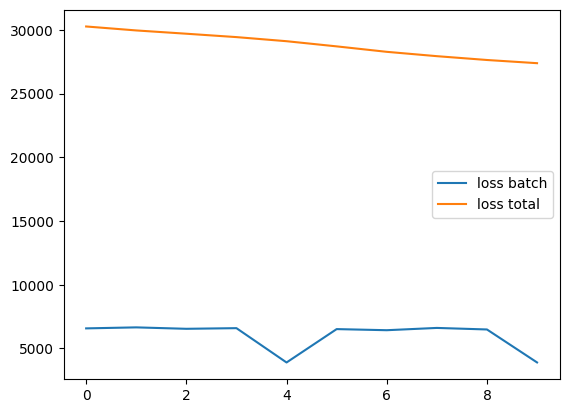

In [66]:
x = [i for i in range(0, 10)]

plt.plot(x, [log_loss_batch[i] for i in x], label="loss batch")
plt.plot(x, [log_loss[i] for i in x], label="loss total")
    
plt.legend()
plt.show()

## Changement de modèle
On va essayer d'améliorer nos résultats,
en s'attelant tout d'abord au nombre de couches et aux fonctions d'activitation

On teste simple MLP à 1 couche cachée avec une fonction d'activiation RELU et l'optimiseur Adam

In [67]:
dataset_train = custom_functions.CustomDataset(X_train, Y_train_cat)
batch_size = 5000 #nombre d'individus par batch
dataloader = custom_functions.get_dataloader(dataset_train, batch_size, shuffle=True)

In [68]:
# Le modèle : un simple MLP à 1 couche cachée
D_in = 20 # dimension de l'input : 20 
D_hidden = 32 # dimension de la couche cachée : 32
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.ReLU(), #test avec une fonction d'activation ReLU
    torch.nn.Linear(D_hidden, D_out),
)
print(model) #même modèle qu'avant mais avec une fonction d'activation ReLU et optimiseur Adam
 
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=6, bias=True)
)


In [69]:
#Fonction qui calcule le nombre de paramètres de notre modèle
custom_functions.summary(model)

Couche 0: [32, 20] (640 paramètres entrainables)
Couche 1: [32] (32 paramètres entrainables)
Couche 2: [6, 32] (192 paramètres entrainables)
Couche 3: [6] (6 paramètres entrainables)
  = 870 paramètres entrainables


In [70]:
Nepochs = 10 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs/5  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 34010.2383 val 48.91%
epoch 2 : loss 34630.5258 val 49.03%
epoch 4 : loss 34623.8306 val 49.10%
epoch 6 : loss 34910.7749 val 49.46%
epoch 8 : loss 35448.2012 val 48.51%


In [71]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 47% avec un MLP à 1 couche cachée et une fonction d'activation ReLU
#On a alors une accuracy moins bonne qu'avec la fonction d'activation sigmoïde et le SGD

accuracy : 47.00%


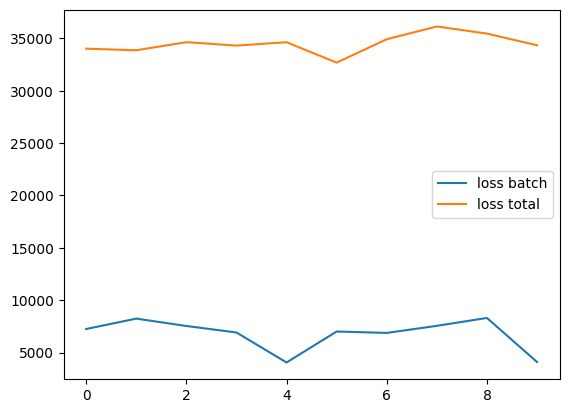

In [72]:
x = [i for i in range(0, 10)]

plt.plot(x, [log_loss_batch[i] for i in x], label="loss batch")
plt.plot(x, [log_loss[i] for i in x], label="loss total")
    
plt.legend()
plt.show()

On teste ensuite en faisant varier le nombre de couches cachées

In [80]:
dataset_train = custom_functions.CustomDataset(X_train, Y_train_cat)
batch_size = 5000 #nombre d'individus par batch
dataloader = custom_functions.get_dataloader(dataset_train, batch_size, shuffle=True)

In [81]:
#On retourne donc sur la fonction d'activation sigmoïde et le SGD
#On fait varier le nombre de couches cachées
D_in = 20 # dimension de l'input : 20 
D_hidden = 128 # dimension de la couche cachée : 128
D_hidden2 = 64 # dimension de la couche cachée : 64
D_hidden3 = 32 # dimension de la couche cachée : 32
D_hidden4 = 16 # dimension de la couche cachée : 16
D_hidden5 = 8 # dimension de la couche cachée : 8
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model  = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden, D_hidden2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden2, D_hidden3),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden3, D_hidden4),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden4, D_hidden5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden5, D_out),
)
print(model) 
 
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=8, out_features=6, bias=True)
)


In [75]:
#Fonction qui calcule le nombre de paramètres de notre modèle
custom_functions.summary(model)

Couche 0: [128, 20] (2560 paramètres entrainables)
Couche 1: [128] (128 paramètres entrainables)
Couche 2: [64, 128] (8192 paramètres entrainables)
Couche 3: [64] (64 paramètres entrainables)
Couche 4: [32, 64] (2048 paramètres entrainables)
Couche 5: [32] (32 paramètres entrainables)
Couche 6: [16, 32] (512 paramètres entrainables)
Couche 7: [16] (16 paramètres entrainables)
Couche 8: [8, 16] (128 paramètres entrainables)
Couche 9: [8] (8 paramètres entrainables)
Couche 10: [6, 8] (48 paramètres entrainables)
Couche 11: [6] (6 paramètres entrainables)
  = 13742 paramètres entrainables


In [82]:
Nepochs = 1 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 41263.5773 val 15.09%


In [83]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 15% avec un MLP à 5 couches cachées et une fonction d'activation sigmoïde
#On obtient des résultats très mauvais, on peut essayer avec un MLP à 2 couches cachées

accuracy : 15.08%


On retourne sur la fonction d'activation sigmoïde avec l'optimiseur Adam avec 2 couches cachées

In [98]:
#On retourne donc sur la fonction d'activation sigmoïde et on teste Adam
#On fait varier le nombre de couches cachées
D_in = 20 # dimension de l'input : 20 
D_hidden = 128 # dimension de la couche cachée : 128
D_hidden2 = 64 # dimension de la couche cachée : 64
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model  = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden, D_hidden2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(D_hidden2, D_out),
)
print(model) 
 
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=6, bias=True)
)


In [99]:
#Fonction qui calcule le nombre de paramètres de notre modèle
custom_functions.summary(model)

Couche 0: [128, 20] (2560 paramètres entrainables)
Couche 1: [128] (128 paramètres entrainables)
Couche 2: [64, 128] (8192 paramètres entrainables)
Couche 3: [64] (64 paramètres entrainables)
Couche 4: [6, 64] (384 paramètres entrainables)
Couche 5: [6] (6 paramètres entrainables)
  = 11334 paramètres entrainables


In [100]:
Nepochs = 1 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 32909.5067 val 45.39%


In [101]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 44% avec un MLP à 2 couches cachées et une fonction d'activation sigmoïde

accuracy : 44.35%


### Test de différents heuristiques afin d'améliorer l'accuracy ou bien le temps d'exécution

Utilisation du gradient clipping

In [89]:
dataset_train = custom_functions.CustomDataset(X_train, Y_train_cat)
batch_size = 5000 #nombre d'individus par batch
dataloader = custom_functions.get_dataloader(dataset_train, batch_size, shuffle=True)

In [92]:
# Le modèle : un simple MLP à 1 couche cachée
D_in = 20 # dimension de l'input : 20 
D_hidden = 32 # dimension de la couche cachée : 32
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.Sigmoid(), #test avec une fonction d'activation sigmoïde
    torch.nn.Linear(D_hidden, D_out),
)
print(model) 
 
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=32, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=32, out_features=6, bias=True)
)


In [93]:
Nepochs = 10 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs/5  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5) #on clippe le gradient pour éviter l'explosion du gradient
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 30610.1944 val 50.81%
epoch 2 : loss 28627.2559 val 53.50%
epoch 4 : loss 28392.7477 val 55.25%
epoch 6 : loss 28273.8499 val 53.97%
epoch 8 : loss 28219.8878 val 54.51%


In [94]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 53% avec l'utiisation du gradient clipping
#Nous obtenons un modèle assez similaire que celui sélectionné au préalable

accuracy : 53.22%


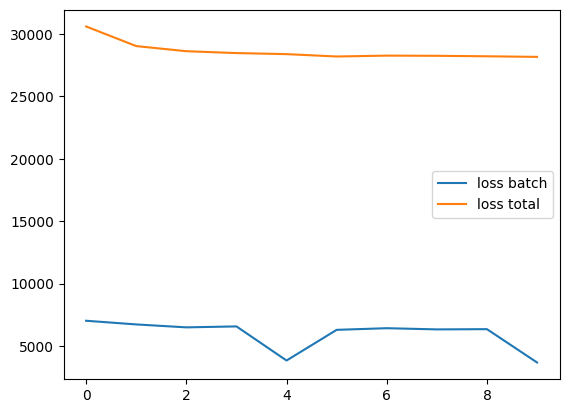

In [95]:
x = [i for i in range(0, 10)]

plt.plot(x, [log_loss_batch[i] for i in x], label="loss batch")
plt.plot(x, [log_loss[i] for i in x], label="loss total")
    
plt.legend()
plt.show() #loss plus faible au départ avec le gradient clipping

Utilisation du dropout sur les couches cachées

In [113]:
# Le modèle : un simple MLP à 4 couches cachées avec dropout
D_in = 20 # dimension de l'input : 20
D_hidden = 128 # dimension de la couche cachée : 128
D_hidden2 = 64 # dimension de la couche cachée : 64
D_hidden3 = 32 # dimension de la couche cachée : 32
D_hidden4 = 16 # dimension de la couche cachée : 16
D_out = 6 # dimension de l'output : 6

# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model  = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2), #on ajoute un dropout de 20%
    torch.nn.Linear(D_hidden, D_hidden2),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(D_hidden2, D_hidden3),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(D_hidden3, D_hidden4),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.2),
    torch.nn.Linear(D_hidden4, D_out),
)
print(model)

loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=128, out_features=64, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2, inplace=False)
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.2, inplace=False)
  (9): Linear(in_features=32, out_features=16, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.2, inplace=False)
  (12): Linear(in_features=16, out_features=6, bias=True)
)


In [114]:
Nepochs = 10 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs/5  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        for i in range(lenB): # boucle sur les individus du batch
            optimizer.zero_grad() # remise à zéro du gradient
            prediction = model(data[i]).squeeze()   # passe "forward"
            loss = loss_fn(prediction, target[i].double()) # calcul de la fonction de coût courante
            loss.backward()  # backpropagation à travers le réseau       
            optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
            loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 34171.5818 val 44.18%
epoch 2 : loss 30557.6497 val 50.61%
epoch 4 : loss 29824.0314 val 51.00%
epoch 6 : loss 29506.6277 val 52.76%
epoch 8 : loss 29415.2660 val 53.18%


In [115]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 52% avec un MLP à 4 couches cachées et un dropout de 20%
#Nous n'avons pas amélioré significativement notre modèle avec le dropout

accuracy : 51.72%


Utilisation de la batch normalization

In [104]:
# Le modèle : un simple MLP à 1 couche cachée avec batch normalization
D_in = 20 # dimension de l'input : 20 
D_hidden = 32 # dimension de la couche cachée : 32
D_out = 6 # dimension de l'output : 6
 
# Utilisation d'un constructeur séquentiel pour définir l'architecture du réseau
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_hidden),
    torch.nn.BatchNorm1d(D_hidden), # batch normalization
    torch.nn.Sigmoid(), # fonction d'activation sigmoïde
    torch.nn.Linear(D_hidden, D_out),
)
print(model)

loss_fn = torch.nn.CrossEntropyLoss(reduction='sum') # La fonction de coût cross entropy
learning_rate = 1e-2   # le pas d'apprentissage
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # l'optimiseur
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # l'optimiseur

Sequential(
  (0): Linear(in_features=20, out_features=32, bias=True)
  (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Sigmoid()
  (3): Linear(in_features=32, out_features=6, bias=True)
)


In [109]:
Nepochs = 30 # Nombre d'époques (Nombre de passes sur toutes les données) 
Nprint  = Nepochs/10  # fréquence de l'affichage

# mesures que l'on souhaite enregistrer pour monitorer l'apprentissage (log)
log_loss_batch = []
log_loss = []
log_acc_val = []

# Boucle d'apprentissage
for epoch in range(Nepochs):
    total=0.
    for batch_idx, (data, target) in enumerate(dataloader): # 1 batch
        loss_batch=0.
        lenB = data.shape[0] # nombre d'individus dans le batch
        optimizer.zero_grad() # remise à zéro du gradient
        prediction = model(data).squeeze()   # passe "forward"
        loss = loss_fn(prediction, target.double()) # calcul de la fonction de coût courante
        loss.backward()  # backpropagation à travers le réseau       
        optimizer.step() # mise à jour des paramètres du réseau ( w = w -lr * w.grad) équivalent à une itération du SGD
        loss_batch+=loss # calcul de la loss sur tous les exemples du batch
        total += loss_batch # calcul de la loss sur tous les exemples d'entraînement
        # on enregistre les informations pour le monitoring
        log_loss_batch.append(loss_batch.item()) 
        pred_val = model(X_val) # prédiction sur l'ensemble de validation
        acc_val = custom_functions.get_accuracy_multiclass(pred_val,Y_val_cat,6) 
        log_acc_val.append(acc_val)
    # affichage
    if epoch%Nprint==0:
        print(f"epoch {epoch} : loss {total:.4f} val {acc_val:.2%}") 
    log_loss.append(total.item()) # on enregistre la loss moyenne sur le batch

epoch 0 : loss 29804.1338 val 50.71%
epoch 3 : loss 29650.4248 val 50.74%
epoch 6 : loss 29524.5879 val 50.87%
epoch 9 : loss 29417.0716 val 51.15%
epoch 12 : loss 29306.3964 val 51.31%
epoch 15 : loss 29181.8841 val 51.48%
epoch 18 : loss 29057.2698 val 51.96%
epoch 21 : loss 28921.3291 val 52.35%
epoch 24 : loss 28799.2509 val 52.63%
epoch 27 : loss 28632.7558 val 52.74%


In [110]:
predictions_test = model(X_test)
acc_val = custom_functions.get_accuracy_multiclass(predictions_test,Y_test_cat,6)
print(f"accuracy : {acc_val:.2%}") #on obtient une accuracy de 52% avec un MLP à 1 couche cachée et un batch normalization
#On diminue significativement le temps d'exécution avec le batch normalization

accuracy : 52.01%


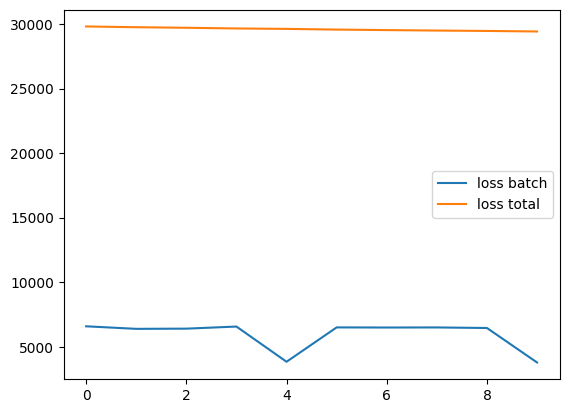

In [111]:
x = [i for i in range(0, 10)]

plt.plot(x, [log_loss_batch[i] for i in x], label="loss batch")
plt.plot(x, [log_loss[i] for i in x], label="loss total")
    
plt.legend()
plt.show() 

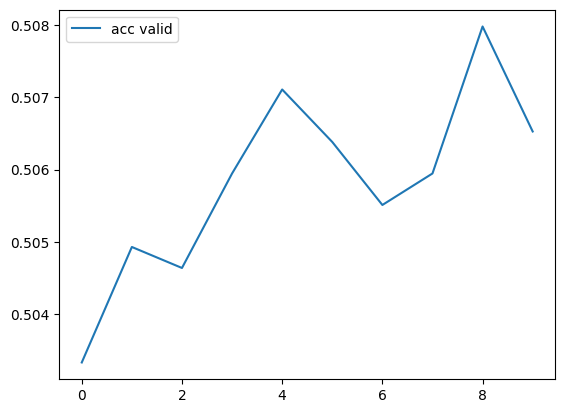

In [112]:
plt.plot(x, [log_acc_val[i] for i in x], label="acc valid")    
plt.legend()
plt.show()